In [1]:
# Simulation-Uhrzeit: Simulationszeit als Uhrzeit [hh:mm:ss] = simulation time
# Simulationssekunde: Simulationzeit
#Fahrzeugprotokol = Vehicle record
#Eindeutige Fahrzeugnummer = Vehicle number
#Entfernung auf der Strecke vom Beginn der Strecke oder Verbindungsstrecke = Position
#Querposition am Ende des Zeitschritts. Wertebereich 0-1:   = Position LAT
# 0: an der rechten Fahrstreifenkante
# 0.5: Mitte des Fahrstreifens
# 1: an der linken Fahrstreifenkante

# Beschleinigung = acceleration
# Geschwindigkeit = Speed

# Zeit im Netz : Die gesamte Zeit, die ein Fahrzeug im Netz ist:
# Der Wert wird erst in der letzten Sekunde, bevor das Fahrzeug das Netz verlässt, gespeichert.
# Protokollieren Sie in diesem Zeitschritt auch die Verlustzeit für das Fahrzeug.
# Für Fahrzeuge, die sich am Ende der Simulation noch im Netz befinden, können Sie die Gesamtzeit anhand ihrer Einsetzzeit ermitteln.

# https://datatofish.com/descriptive-statistics-pandas/
# https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution

# variance:
# https://blog.finxter.com/how-to-calculate-the-column-variance-of-a-dataframe-in-python-pandas/
# axis = 0 is Row, axis = 1 is Column
#simulation second is from 0 to 7200.0
# steps are 0.5, 0.6, 0.7

# Vehicle type is 100, 150, 200, 300
# 100 = car, 150 = transporter, 200 = HGV, 300 = bus

In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# this method manages the drawing part
def set_up_sketch() -> "tuple of (ax1,ax2,ax3)":

    xticks = np.arange(0, 320, 10)
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows=3, ncols=1)
    #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
    ax1.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
    ax1.spines["bottom"].set_color("red")
    ax1.spines["left"].set_color("red")
    ax1.set_xticks(xticks)
    ax1.set_xlabel("Position (m)", color="red")
    ax1.set_ylabel("Speed (km/hr)", color="red")
    ax1.grid("on", alpha=0.2)

    ax2.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
    ax2.spines["bottom"].set_color("red")
    ax2.spines["left"].set_color("red")
    ax2.set_xticks(xticks)
    ax2.set_xlabel("position", color="red")
    ax2.set_xticks(xticks)
    ax2.set_xlabel("Position (m)", color="red")
    ax2.set_ylabel("Simulation time(second)", color="red")
    ax2.grid("on", alpha=0.2)

    ax3.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
    ax3.spines["bottom"].set_color("red")
    ax3.spines["left"].set_color("red")
    ax3.set_xticks(xticks)
    ax3.set_xlabel("position", color="red")
    ax3.set_ylabel("Acceleration(m/s2)", color="red")
    ax3.grid("on", alpha=0.2)
    return (ax1,ax2,ax3)

In [4]:
# base scenario

#change the vehicle type from number to name
vehicle_routes_based = pd.read_csv("data/Trajectories/GothaerPlatz - baseline.csv")
#change the vehicle type from number to name
vehicle_routes_based['VEHTYPE'].replace(to_replace=[100, 150, 200, 300], value=["Car", "Transporter", "HGV", "Bus"],
                                        inplace=True)
len(vehicle_routes_based)
# show the unique cars
number_of_cars_based_scenario = vehicle_routes_based["$VEHICLE:NO"].unique()
# total number of cars in the network in the based scenario
len(number_of_cars_based_scenario)



4090

In [5]:
# scenario1
vehicle_routes_scenario1 = pd.read_csv("data/Trajectories/GothaerPlatz - Scenario 1.csv")
#change the vehicle type from number to name
vehicle_routes_scenario1['VEHTYPE'].replace(to_replace=[100, 150, 200, 300], value=["Car", "Transporter", "HGV", "Bus"],
                                            inplace=True)
len(vehicle_routes_scenario1)
# show the unique cars
number_of_cars_scenario1 = vehicle_routes_scenario1["$VEHICLE:NO"].unique()
# total number of cars in the network in the scenario1
len(number_of_cars_scenario1)

4090

In [6]:
# scenario2
vehicle_routes_scenario2 = pd.read_csv("data/Trajectories/GothaerPlatz - Scenario 2.csv")
#change the vehicle type from number to name
vehicle_routes_scenario2['VEHTYPE'].replace(to_replace=[100, 150, 200, 300], value=["Car", "Transporter", "HGV", "Bus"],
                                            inplace=True)
len(vehicle_routes_scenario2)
# show the unique cars
number_of_cars_scenario2 = vehicle_routes_scenario2["$VEHICLE:NO"].unique()
# total number of cars in the network in the scenario2
len(number_of_cars_scenario2)


4090

In [7]:
# show trajectories of the based model
vehicle_routes_based.head()


,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
0,1,00:00:00.50,0.5,0.52,0.5,Car,52.98,0.0,1.47,4.01,24,1
1,1,00:00:00.60,0.6,1.99,0.5,Car,52.98,0.0,2.94,4.01,24,1
2,1,00:00:00.70,0.7,3.46,0.5,Car,52.98,0.0,4.42,4.01,24,1
3,1,00:00:00.80,0.8,4.93,0.5,Car,52.98,0.0,5.89,4.01,24,1
4,1,00:00:00.90,0.9,6.40,0.5,Car,52.98,0.0,7.36,4.01,24,1


In [8]:
# show trajectories of the scenario 1
vehicle_routes_scenario1.head()


,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
0,1,00:00:00.50,0.5,0.52,0.5,Car,52.98,0.0,1.47,4.01,24,1
1,1,00:00:00.60,0.6,1.99,0.5,Car,52.98,0.0,2.94,4.01,24,1
2,1,00:00:00.70,0.7,3.46,0.5,Car,52.98,0.0,4.42,4.01,24,1
3,1,00:00:00.80,0.8,4.93,0.5,Car,52.98,0.0,5.89,4.01,24,1
4,1,00:00:00.90,0.9,6.40,0.5,Car,52.98,0.0,7.36,4.01,24,1


In [9]:
# show trajectories of the scenario 2
vehicle_routes_scenario2.head()


,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
0,1,00:00:00.50,0.5,0.52,0.5,Car,52.98,0.0,1.47,4.01,24,1
1,1,00:00:00.60,0.6,1.99,0.5,Car,52.98,0.0,2.94,4.01,24,1
2,1,00:00:00.70,0.7,3.46,0.5,Car,52.98,0.0,4.42,4.01,24,1
3,1,00:00:00.80,0.8,4.93,0.5,Car,52.98,0.0,5.89,4.01,24,1
4,1,00:00:00.90,0.9,6.40,0.5,Car,52.98,0.0,7.36,4.01,24,1


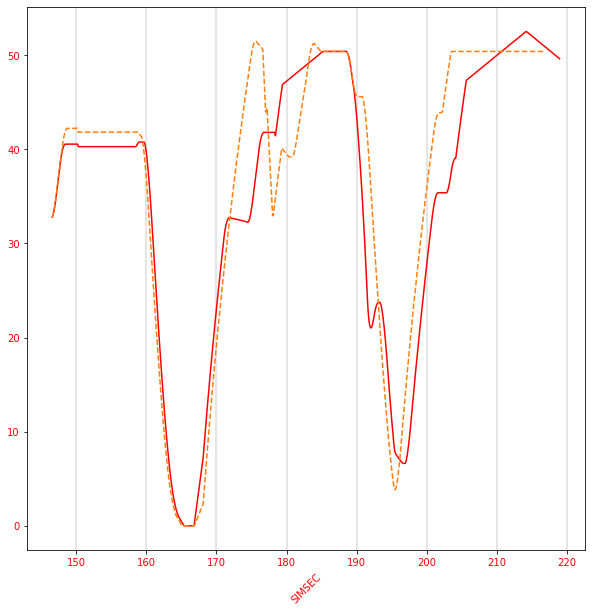

In [10]:
# for the car number 101 in the based scenario, plot the acceleration in each time step
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D
car_101_based = vehicle_routes_based[vehicle_routes_based["$VEHICLE:NO"] == 101]
car_101_scenario1 = vehicle_routes_scenario1[vehicle_routes_scenario1["$VEHICLE:NO"] == 101]
fig, ax = plt.subplots(figsize=(10, 10))
plt.xticks(fontsize=10, color="red")
plt.yticks(fontsize=10, color="red")
ax.set_xlabel("SIMSEC", fontsize=10, color="red", rotation="45")
line1, = ax.plot(car_101_based["SIMSEC"], car_101_based["SPEED"])
line1.set_color("red")
line2, = ax.plot(car_101_scenario1["SIMSEC"], car_101_scenario1["SPEED"])
line2.set_linestyle("--")
ax.xaxis.grid(True, color="black", linewidth=0.2)



In [11]:
#car 101 based
car_101_based

,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
47036,101,00:02:26.60,146.6,0.50,0.5,Car,32.80,0.36,0.91,4.64,24,1
47075,101,00:02:26.70,146.7,1.41,0.5,Car,33.03,0.64,1.82,4.64,24,1
47114,101,00:02:26.80,146.8,2.33,0.5,Car,33.34,0.87,2.75,4.64,24,1
47153,101,00:02:26.90,146.9,3.26,0.5,Car,33.73,1.07,3.68,4.64,24,1
47192,101,00:02:27.00,147.0,4.21,0.5,Car,34.18,1.27,4.62,4.64,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74351,101,00:03:38.50,218.5,92.43,0.5,Car,49.89,-0.17,710.24,4.64,106,1
74388,101,00:03:38.60,218.6,93.81,0.5,Car,49.83,-0.17,711.63,4.64,106,1
74425,101,00:03:38.70,218.7,95.19,0.5,Car,49.77,-0.17,713.01,4.64,106,1
74462,101,00:03:38.80,218.8,96.58,0.5,Car,49.70,-0.17,714.39,4.64,106,1


In [12]:
#car 101 scenario 1
car_101_scenario1

,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
46950,101,00:02:26.60,146.6,0.50,0.5,Car,32.80,0.36,0.91,4.64,24,1
46990,101,00:02:26.70,146.7,1.41,0.5,Car,33.03,0.64,1.82,4.64,24,1
47030,101,00:02:26.80,146.8,2.33,0.5,Car,33.34,0.87,2.75,4.64,24,1
47070,101,00:02:26.90,146.9,3.26,0.5,Car,33.73,1.07,3.68,4.64,24,1
47110,101,00:02:27.00,147.0,4.21,0.5,Car,34.18,1.27,4.62,4.64,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73305,101,00:03:36.40,216.4,92.21,0.5,Car,50.41,0.00,710.03,4.64,106,1
73343,101,00:03:36.50,216.5,93.61,0.5,Car,50.41,0.00,711.43,4.64,106,1
73381,101,00:03:36.60,216.6,95.01,0.5,Car,50.41,0.00,712.83,4.64,106,1
73418,101,00:03:36.70,216.7,96.41,0.5,Car,50.41,0.00,714.23,4.64,106,1


In [13]:
# Car following model: cars which are going on the same link within 5 minutes (16:50 - 16:55)
#alol cars on link 24
all_cars_on_link_24_based = vehicle_routes_based[
    (vehicle_routes_based["LANE\\LINK\\NO"] == 24) & (vehicle_routes_based["SIMSEC"] < 3300) & (
            vehicle_routes_based["SIMSEC"] > 3000)]
all_cars_on_link_24_based

,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
1158794,1904,00:50:00.10,3000.1,50.72,0.5,Car,50.19,0.00,51.59,4.64,24,1
1158829,1904,00:50:00.20,3000.2,52.11,0.5,Car,50.19,0.00,52.98,4.64,24,1
1158864,1904,00:50:00.30,3000.3,53.51,0.5,Car,50.19,0.00,54.37,4.64,24,1
1158899,1904,00:50:00.40,3000.4,54.90,0.5,Car,50.19,0.00,55.77,4.64,24,1
1158934,1904,00:50:00.50,3000.5,56.30,0.5,Car,50.19,0.00,57.16,4.64,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1268291,2078,00:54:59.90,3299.9,195.30,0.5,Transporter,41.09,-0.21,196.30,4.76,24,1
1268292,2079,00:54:59.90,3299.9,158.70,0.5,Transporter,36.90,-2.53,159.72,4.76,24,2
1268293,2080,00:54:59.90,3299.9,144.79,0.5,Car,47.38,-0.05,145.93,4.64,24,1
1268294,2081,00:54:59.90,3299.9,141.81,0.5,Car,44.73,-2.73,142.13,4.64,24,2


1904
1913
1917
1924
1916


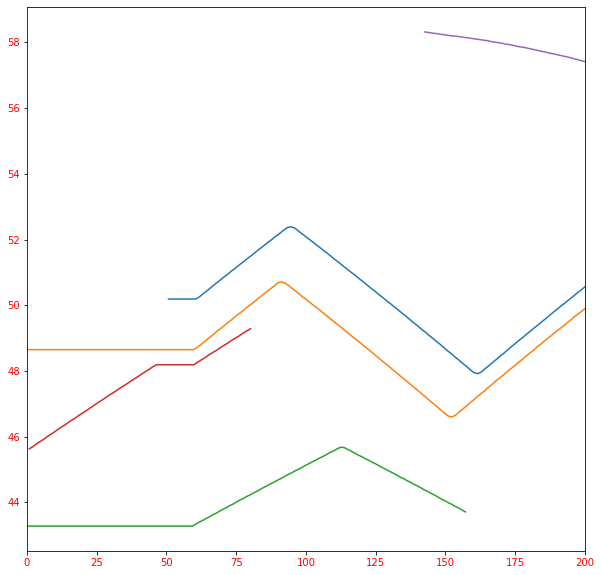

In [14]:
all_cars_on_link_24_tenseconds_based = all_cars_on_link_24_based[(all_cars_on_link_24_based["SIMSEC"] < 3030) & (all_cars_on_link_24_based["SIMSEC"] > 3000) & (all_cars_on_link_24_based["LANE\INDEX"] == 1)]
all_cars_on_link_24_tenseconds_based.groupby(["$VEHICLE:NO"]).mean()
cars_tenseconds_based = all_cars_on_link_24_tenseconds_based["$VEHICLE:NO"].unique()
#cars numbers 1904, 1906, 1913 move on the link within 10 seconds on the link 24.
fig, ax = plt.subplots(figsize=(10, 10))
plt.xticks(fontsize=10, color="red")
plt.yticks(fontsize=10, color="red")
ax.set_xlim([0, 200])
# for each can within this time, show its number
for car_number in cars_tenseconds_based:
    print(car_number)
    specific_car = all_cars_on_link_24_tenseconds_based[
    all_cars_on_link_24_tenseconds_based["$VEHICLE:NO"] == car_number]
    ax.plot(specific_car["POS"], specific_car["SPEED"])



1904
1913
1917
1924
1916


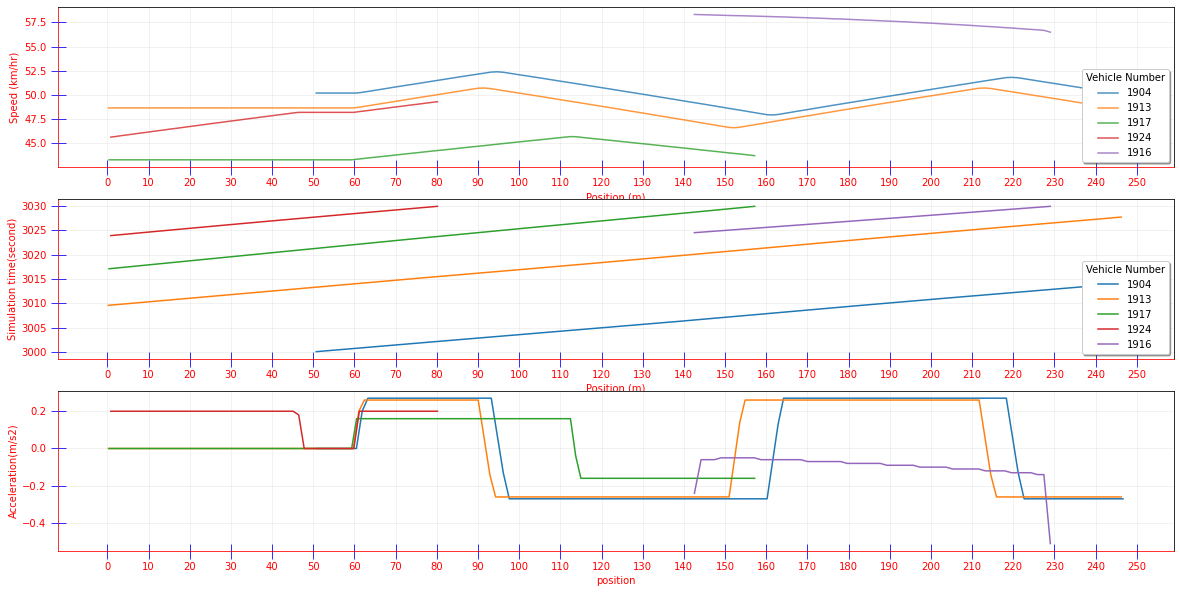

In [15]:
# based scenario
# ax.spines['bottom'].set_color('blue')
# ax.spines['top'].set_color('red')
# ax.spines['right'].set_color('magenta')
# ax.spines['right'].set_linewidth(3)
# ax.spines['left'].set_color('orange')
# ax.spines['left'].set_lw(3)
# ax.xaxis.label.set_color('purple')
# ax.yaxis.label.set_color('silver')
# ax.tick_params(colors='red', which='both')  # 'both' refers to minor and major axes

# xticks = np.arange(0, 320, 10)
# fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows=3, ncols=1)
# #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
# ax1.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
# ax1.spines["bottom"].set_color("red")
# ax1.spines["left"].set_color("red")
# ax1.set_xticks(xticks)
# ax1.set_xlabel("Position (m)", color="red")
# ax1.set_ylabel("Speed (km/hr)", color="red")
# ax1.grid("on", alpha=0.2)
#
# ax2.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
# ax2.spines["bottom"].set_color("red")
# ax2.spines["left"].set_color("red")
# ax2.set_xticks(xticks)
# ax2.set_xlabel("position", color="red")
# ax2.set_xticks(xticks)
# ax2.set_xlabel("Position (m)", color="red")
# ax2.set_ylabel("Simulation time(second)", color="red")
# ax2.grid("on", alpha=0.2)
#
# ax3.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
# ax3.spines["bottom"].set_color("red")
# ax3.spines["left"].set_color("red")
# ax3.set_xticks(xticks)
# ax3.set_xlabel("position", color="red")
# ax3.set_ylabel("Acceleration(m/s2)", color="red")
# ax3.grid("on", alpha=0.2)
ax1,ax2,ax3  = set_up_sketch()
# sketch the information
for car_number in cars_tenseconds_based:
    print(car_number)
    specific_car = all_cars_on_link_24_tenseconds_based[all_cars_on_link_24_tenseconds_based["$VEHICLE:NO"] == car_number]
    ax1.plot(specific_car["POS"], specific_car["SPEED"], label=car_number, alpha=0.8)
    ax2.plot(specific_car["POS"], specific_car["SIMSEC"], label=car_number)
    ax3.plot(specific_car["POS"], specific_car["ACCELERATION"], label=car_number)
#set upd legends
ax1.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number")
ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number")
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html

# plt.savefig("speed.png")

1904
1913
1917
1924
1916


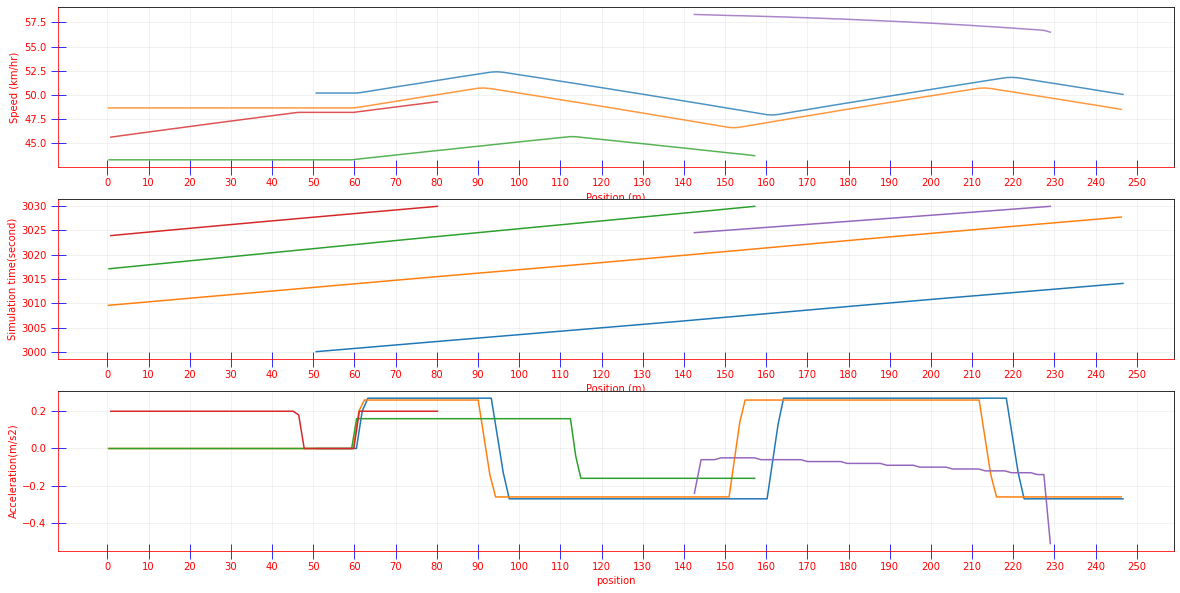

In [16]:
# xticks = np.arange(0, 320, 10)
# fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows=3, ncols=1)
# #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
# ax1.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
# ax1.spines["bottom"].set_color("red")
# ax1.spines["left"].set_color("red")
# ax1.set_xticks(xticks)
# ax1.set_xlabel("Position (m)", color="red")
# ax1.set_ylabel("Speed (km/hr)", color="red")
# ax1.grid("on", alpha=0.2)
#
# ax2.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
# ax2.spines["bottom"].set_color("red")
# ax2.spines["left"].set_color("red")
# ax2.set_xticks(xticks)
# ax2.set_xlabel("position", color="red")
# ax2.set_xticks(xticks)
# ax2.set_xlabel("Position (m)", color="red")
# ax2.set_ylabel("Simulation time(second)", color="red")
# ax2.grid("on", alpha=0.2)
#
# ax3.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
# ax3.spines["bottom"].set_color("red")
# ax3.spines["left"].set_color("red")
# ax3.set_xticks(xticks)
# ax3.set_xlabel("position", color="red")
# ax3.set_ylabel("Acceleration(m/s2)", color="red")
# ax3.grid("on", alpha=0.2)

ax1,ax2,ax3 = set_up_sketch()

for car_number in cars_tenseconds_based:
    print(car_number)
    specific_car = all_cars_on_link_24_tenseconds_based[all_cars_on_link_24_tenseconds_based["$VEHICLE:NO"] == car_number]
    ax1.plot(specific_car["POS"], specific_car["SPEED"], label=car_number, alpha=0.8)
    ax2.plot(specific_car["POS"], specific_car["SIMSEC"], label=car_number)
    ax3.plot(specific_car["POS"], specific_car["ACCELERATION"], label=car_number)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html


In [17]:
# pd.set_option('display.max_rows', 500)
# car_1917 = all_cars_on_link_24_tenseconds_based[all_cars_on_link_24_tenseconds_based["$VEHICLE:NO"] == 1917]
# car_1916 = all_cars_on_link_24_tenseconds_based[all_cars_on_link_24_tenseconds_based["$VEHICLE:NO"] == 1916]
# car_1916

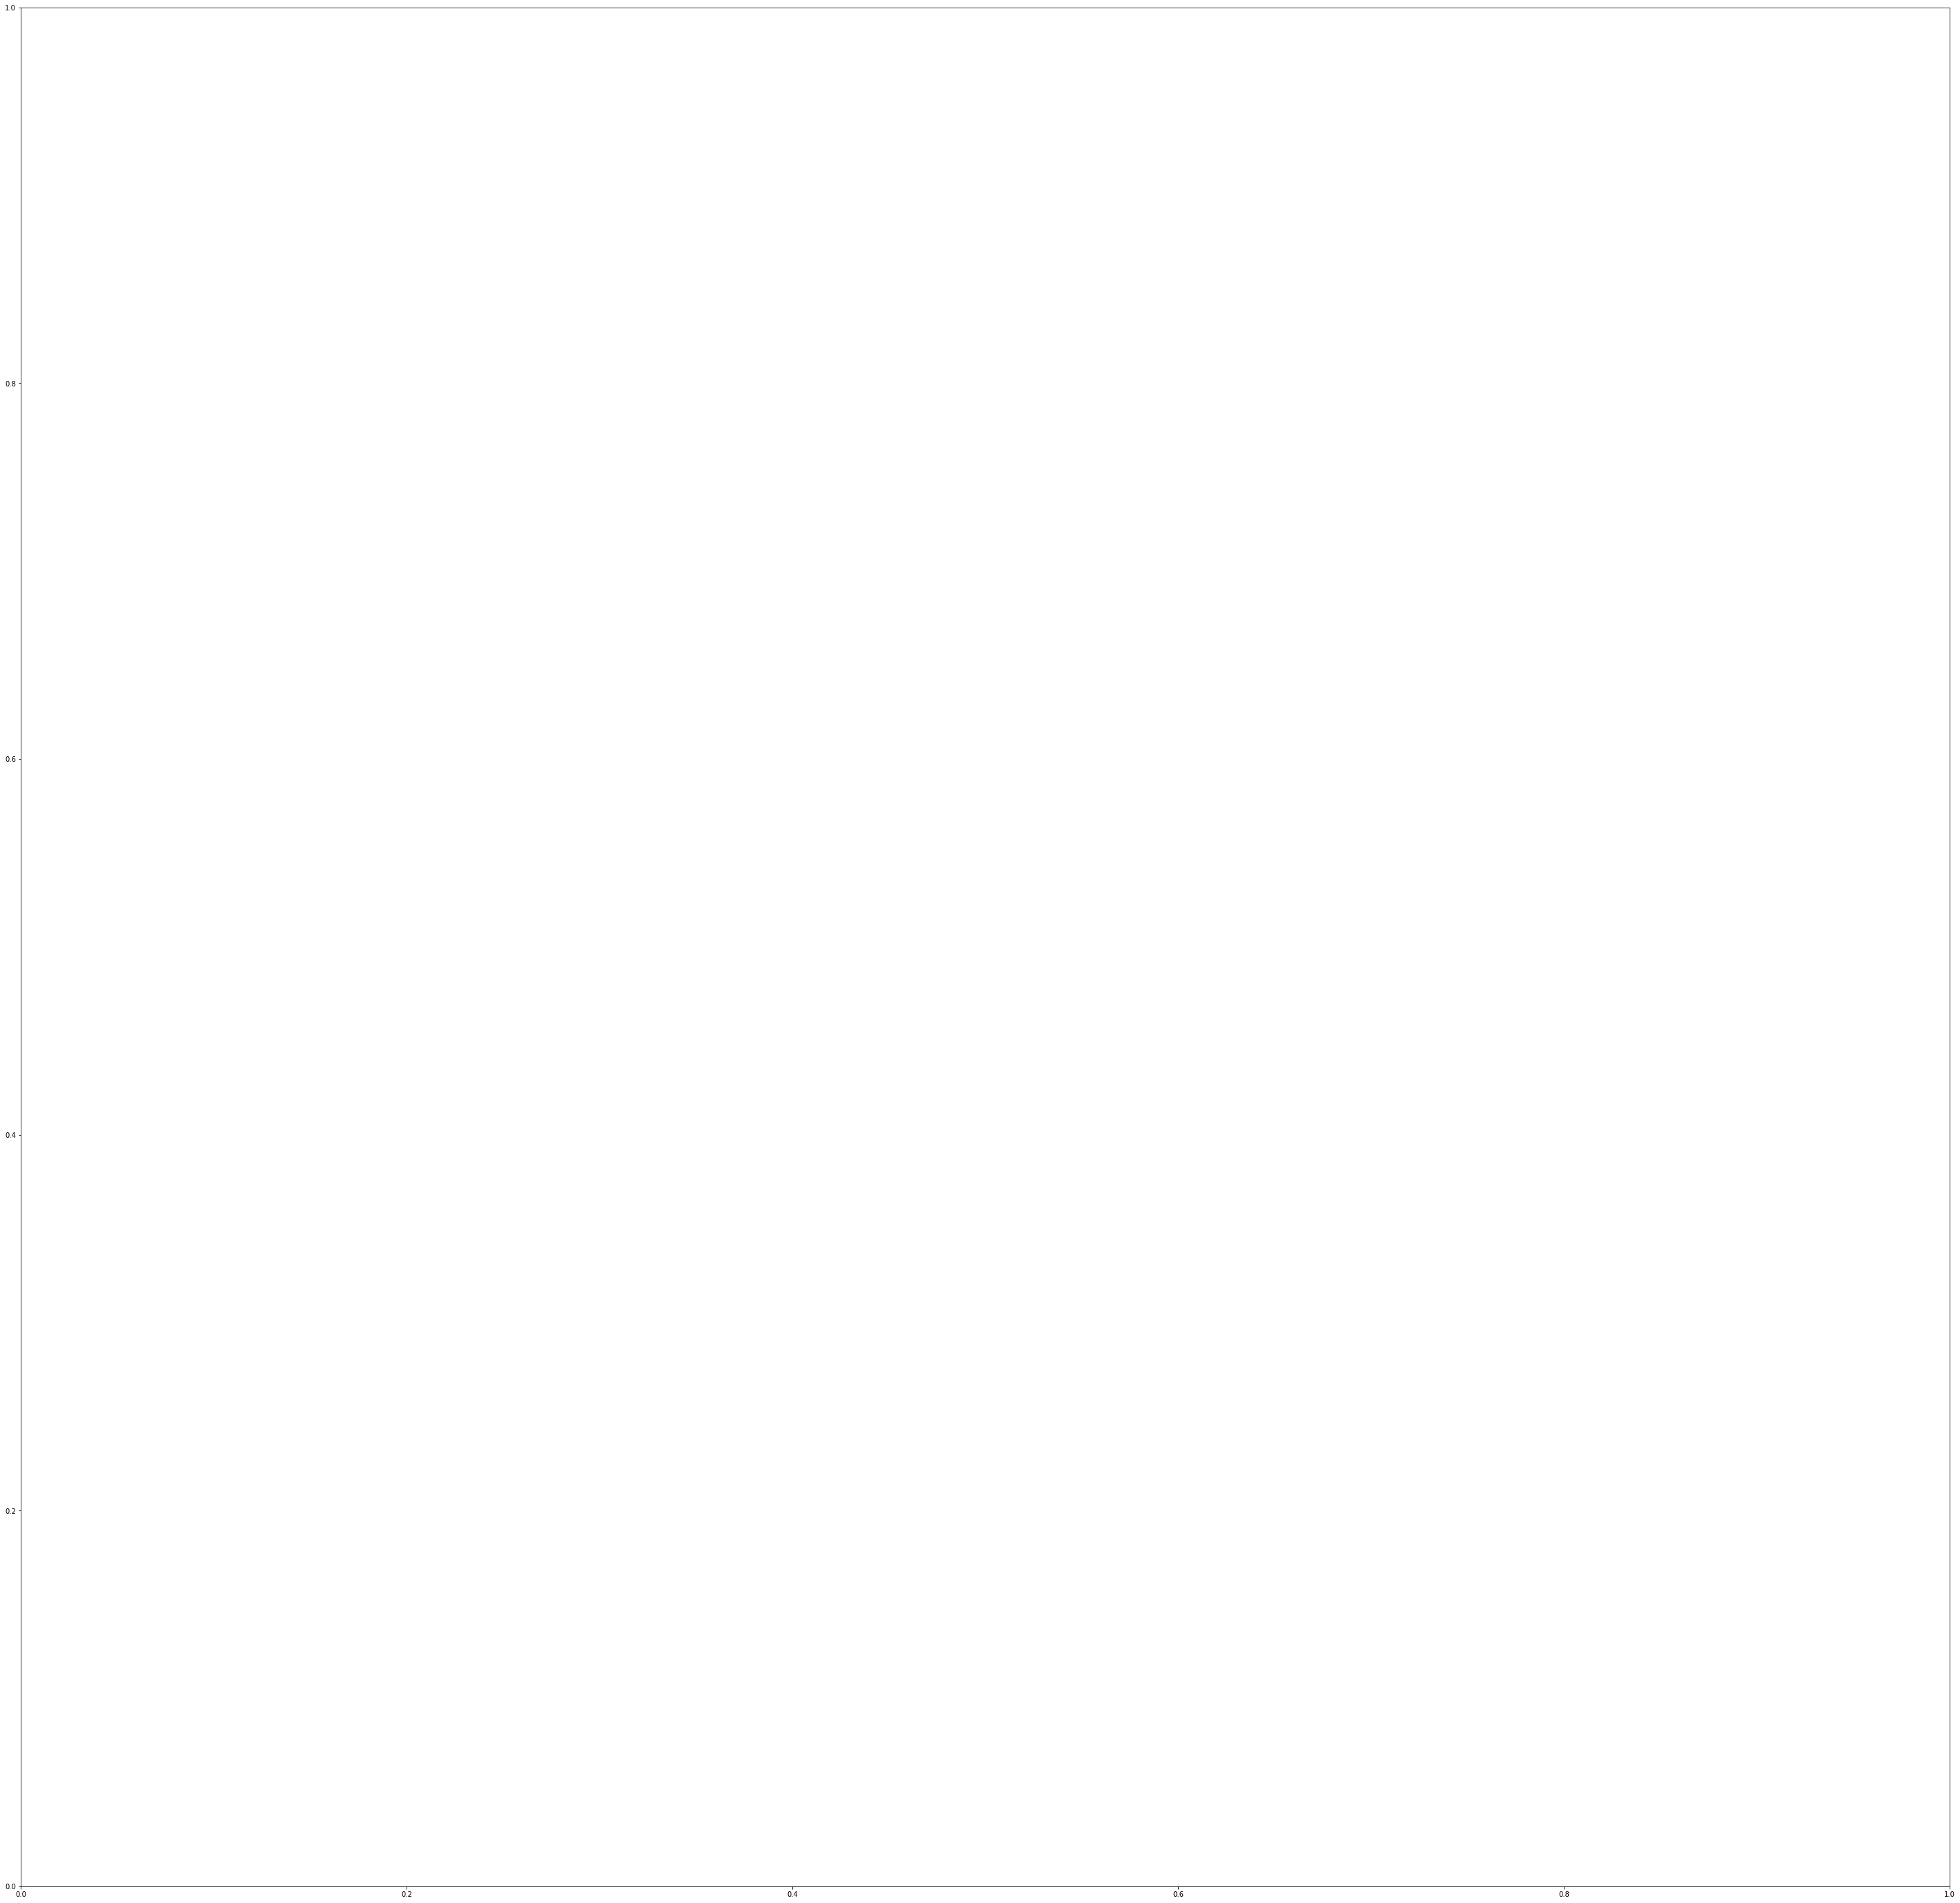

In [18]:
# based scenario
# for each vehicle in the network calculate the arithmetic mean of Acceleration and Speed
grouped_based_scenario = vehicle_routes_based.groupby(["$VEHICLE:NO"]).mean()
fig, ax = plt.subplots(figsize=(50, 50))


In [19]:
# drop the first 100 cars in the network. They are for warm-up
grouped_based_scenario.iloc[100:]

,SIMSEC,POS,POSLAT,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
$VEHICLE:NO,,,,,,,,,
101,182.75,75.032334,0.500000,35.602238,0.065193,332.290456,4.64,54.759669,1.600829
102,169.10,39.106775,0.500000,53.341972,0.016520,318.064803,4.01,43.473318,1.000000
103,187.35,61.709544,0.500759,42.726835,-0.001456,464.840911,4.76,54.146835,1.243038
104,182.65,74.048929,0.500850,39.801599,0.084966,315.492806,4.61,49.477891,1.627551
105,178.05,38.890837,0.500000,55.014713,0.013876,319.997775,4.01,43.614833,1.000000
...,...,...,...,...,...,...,...,...,...
4086,7192.85,74.040694,0.500000,54.327778,-0.301597,111.101389,4.21,62.729167,2.000000
4087,7194.80,45.012095,0.500000,47.697048,-0.020000,70.726476,4.01,1.657143,1.000000
4088,7195.80,59.002118,0.500000,50.687412,0.074824,60.055529,4.61,24.000000,1.000000


In [20]:
# For each car, we calculate the mean speed at each time step. So every car has one arithmetic mean speed in the simulation.
# The mean speed of the simulation consists of the mean speed of each vehicle.
# based scenario
mean_speed_of_veh_based = vehicle_routes_based.groupby(["$VEHICLE:NO"]).mean()[["SPEED"]]
mean_speed_of_veh_based.mean()

SPEED    47.694309
dtype: float64

In [21]:
# For each car, we calculate the mean speed at each time step. So every car has one arithmetic mean speed in the simulation.
# The mean speed of the simulation consists of the mean speed of each vehicle.
# scenario 1
mean_speed_of_veh_scenario1 = vehicle_routes_scenario1.groupby(["$VEHICLE:NO"]).mean()[["SPEED"]]
mean_speed_of_veh_scenario1.mean()

SPEED    48.239769
dtype: float64

In [22]:
# For each car, we calculate the mean speed at each time step. So every car has one arithmetic mean speed in the simulation.
# The mean speed of the simulation consists of the mean speed of each vehicle.
# scenario 2
mean_speed_of_veh_scenario2 = vehicle_routes_scenario2.groupby(["$VEHICLE:NO"]).mean()[["SPEED"]]
mean_speed_of_veh_scenario2.mean()


SPEED    47.5539
dtype: float64

In [23]:
# based model
vehicle_routes_based[(vehicle_routes_based["SPEED"] < 1) & (vehicle_routes_based["ACCELERATION"] > 1)].describe()

,$VEHICLE:NO,SIMSEC,POS,POSLAT,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,1776.347926,2942.541935,47.229009,0.492074,0.718387,1.234793,346.244217,4.780392,60.995392,1.433180
std,1116.769779,1893.063951,58.587002,0.064352,0.150879,0.364352,107.385737,1.398445,31.128356,0.549117
min,19.000000,55.100000,0.240000,0.030000,0.440000,1.010000,165.790000,4.010000,15.000000,1.000000
25%,752.750000,1254.025000,16.310000,0.500000,0.610000,1.070000,312.550000,4.210000,53.000000,1.000000
50%,1639.000000,2619.150000,20.520000,0.500000,0.630000,1.120000,319.075000,4.610000,54.000000,1.000000
75%,2688.750000,4389.550000,49.202500,0.500000,0.890000,1.220000,445.195000,4.640000,87.000000,2.000000
max,4068.000000,7180.300000,177.550000,1.000000,0.990000,2.750000,604.890000,10.210000,131.000000,3.000000


In [24]:
# scenario 1
vehicle_routes_scenario1[
    (vehicle_routes_scenario1["SPEED"] < 1) & (vehicle_routes_scenario1["ACCELERATION"] > 1)].describe()# scenario 1





,$VEHICLE:NO,SIMSEC,POS,POSLAT,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,1946.793651,3233.408466,53.654841,0.497540,0.765608,1.225370,347.125106,4.514233,59.171958,1.449735
std,1131.075256,1937.080824,63.162426,0.059445,0.086397,0.244892,117.458517,0.713212,32.559997,0.543944
min,19.000000,55.000000,0.130000,0.000000,0.510000,1.010000,151.160000,4.010000,15.000000,1.000000
25%,1047.250000,1745.175000,16.772500,0.500000,0.730000,1.120000,314.335000,4.210000,24.000000,1.000000
50%,1951.000000,3108.150000,20.620000,0.500000,0.770000,1.185000,319.340000,4.610000,54.000000,1.000000
75%,2866.500000,4771.050000,57.097500,0.500000,0.807500,1.240000,451.072500,4.640000,85.000000,2.000000
max,4068.000000,7167.000000,177.410000,0.930000,0.990000,2.710000,605.050000,10.210000,131.000000,3.000000


In [25]:
# scenario 2
vehicle_routes_scenario2[
    (vehicle_routes_scenario2["SPEED"] < 1) & (vehicle_routes_scenario2["ACCELERATION"] > 1)].describe()# scenario 2



,$VEHICLE:NO,SIMSEC,POS,POSLAT,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,1759.233161,2917.820207,63.371399,0.480518,0.656269,1.435544,356.056321,4.425337,64.518135,1.818653
std,1156.494061,1970.095094,34.311215,0.191292,0.155940,0.182619,75.412716,0.271909,25.871899,0.671801
min,45.000000,107.900000,12.750000,0.030000,0.410000,1.010000,169.580000,4.010000,9.000000,1.000000
25%,770.000000,1259.500000,40.690000,0.400000,0.540000,1.310000,313.030000,4.210000,53.000000,1.000000
50%,1577.000000,2549.500000,57.110000,0.470000,0.610000,1.450000,319.250000,4.610000,54.000000,2.000000
75%,2753.000000,4500.000000,89.130000,0.570000,0.700000,1.580000,436.260000,4.640000,98.000000,2.000000
max,4062.000000,7162.100000,218.360000,0.970000,0.990000,1.830000,525.630000,4.760000,98.000000,3.000000


In [26]:
#CC8 Acceleration from Standstill





